In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import urllib.request 
import os
data_file = "airfoil.csv"
if not os.path.exists(data_file):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat", "airfoil.csv")

In [3]:
af_data = pd.read_csv('airfoil.csv', header=None, delimiter="\t")

In [4]:
af_data.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
af_data.shape

(1503, 6)

In [6]:
af_data.describe()

,0,1,2,3,4,5
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [7]:
headers =  ["Frequency (Hz)","Angle of Attack (degrees)","Chord Length (m)","Free-stream Velocity (m/s)","Suction Side Displacement thickness (m)","Scaled Sound Pressure Level (dB)"]
af_data.columns = headers

In [8]:
af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [9]:
af_data.describe()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [10]:
# I added a new column to categorize data
af_data['Safe Level'] = np.where(af_data.iloc[:,5] <= 120, 'Safe', 'Not Safe')

In [11]:
# Again, I added a new column. I hope to be able to compare this column with
# the previous column in order to make one column with three categories 
af_data['Middle Level'] = np.where((af_data.iloc[:,5] > 120) & (af_data.iloc[:,5] <= 130), 'Not Safe', 'Dangerous')

In [12]:
af_data = af_data.drop(columns = ['Safe Level', 'Middle Level'])

In [13]:
# Jose's code that worked better than mine at categorizing the data
def Category(x):
    if x > 130  :
        return "Dangerous"
    elif x> 120 and x<130 :
        return "Not safe"
    else:
        return"Safe"

In [14]:
af_data['Categorized Sound Level'] = af_data.iloc[:,5]
af_data['Categorized Sound Level'] = af_data['Categorized Sound Level'].map(Category)

In [15]:
af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB),Categorized Sound Level
0,800,0.0,0.3048,71.3,0.002663,126.201,Not safe
1,1000,0.0,0.3048,71.3,0.002663,125.201,Not safe
2,1250,0.0,0.3048,71.3,0.002663,125.951,Not safe
3,1600,0.0,0.3048,71.3,0.002663,127.591,Not safe
4,2000,0.0,0.3048,71.3,0.002663,127.461,Not safe


In [16]:
# I'm creating this data set to see how the categories look compared to the 
# values that weren't used to create the categories
af_data_pairplot = af_data.drop(columns=['Scaled Sound Pressure Level (dB)'])

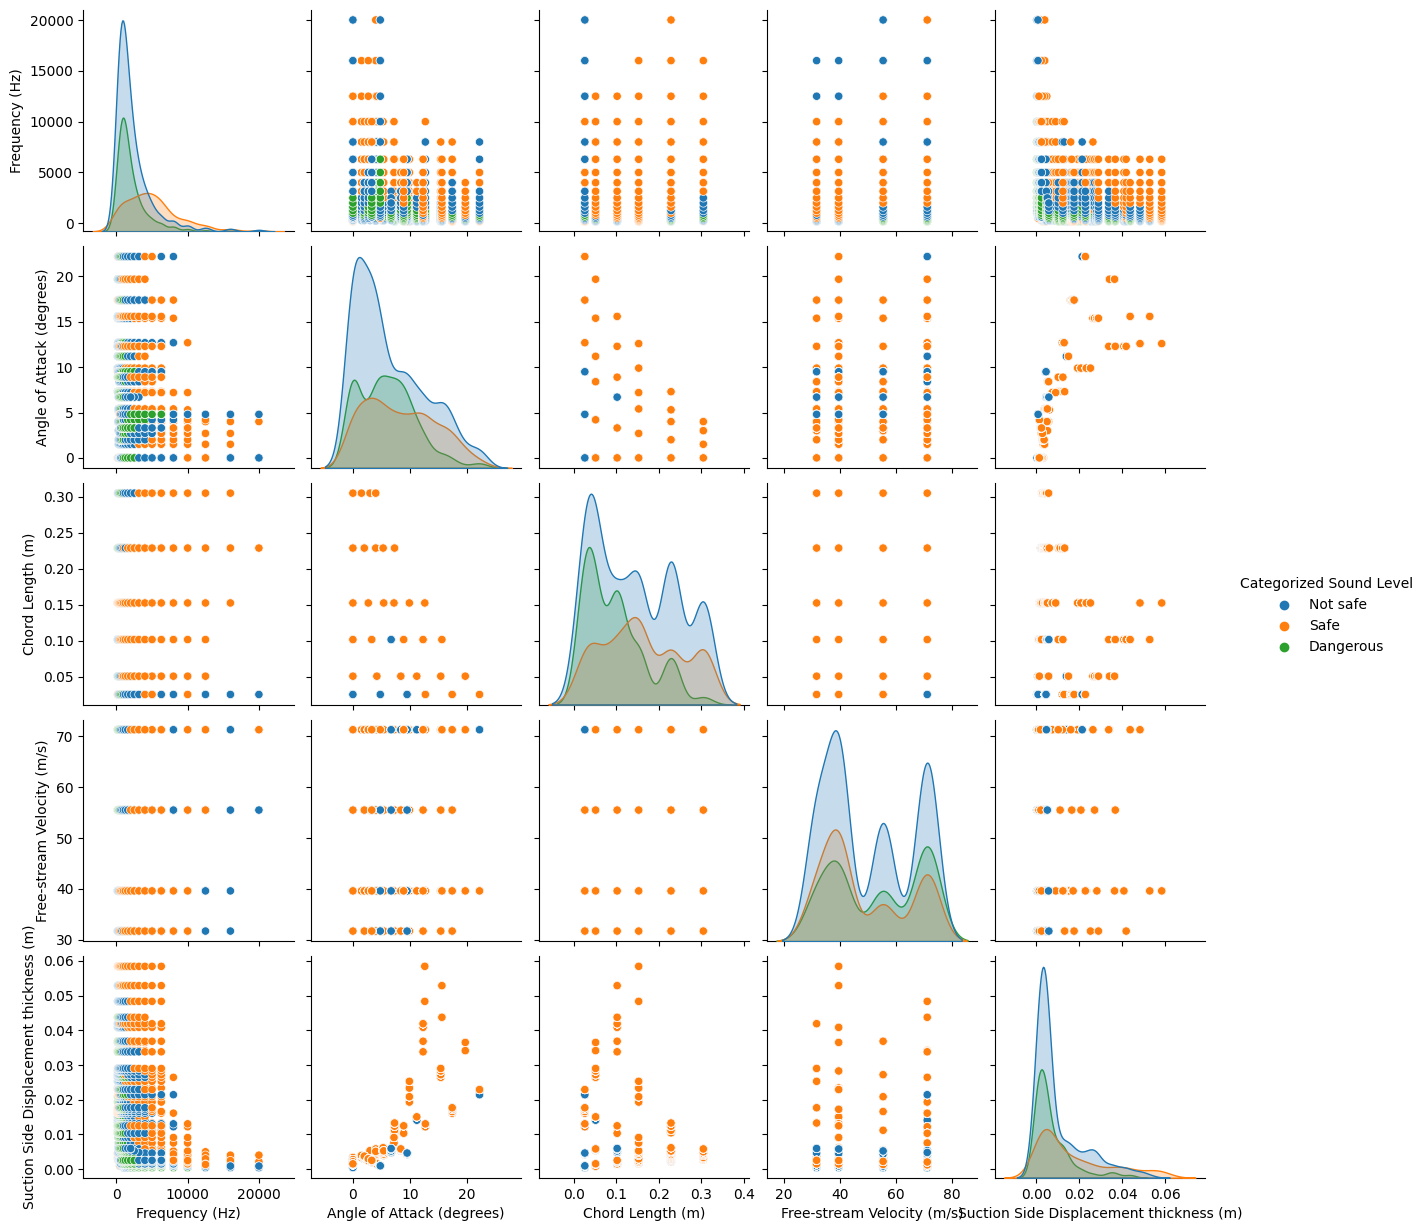

In [17]:
sns.pairplot(af_data_pairplot, hue='Categorized Sound Level');

In [18]:
af_dataNumerical = af_data.select_dtypes(include=np.number)
af_dataNumerical.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [19]:
from sklearn.cluster import KMeans

km = KMeans(3, init = 'random', n_init = 10)

km.fit(af_dataNumerical)

centers = km.cluster_centers_

label = km.labels_

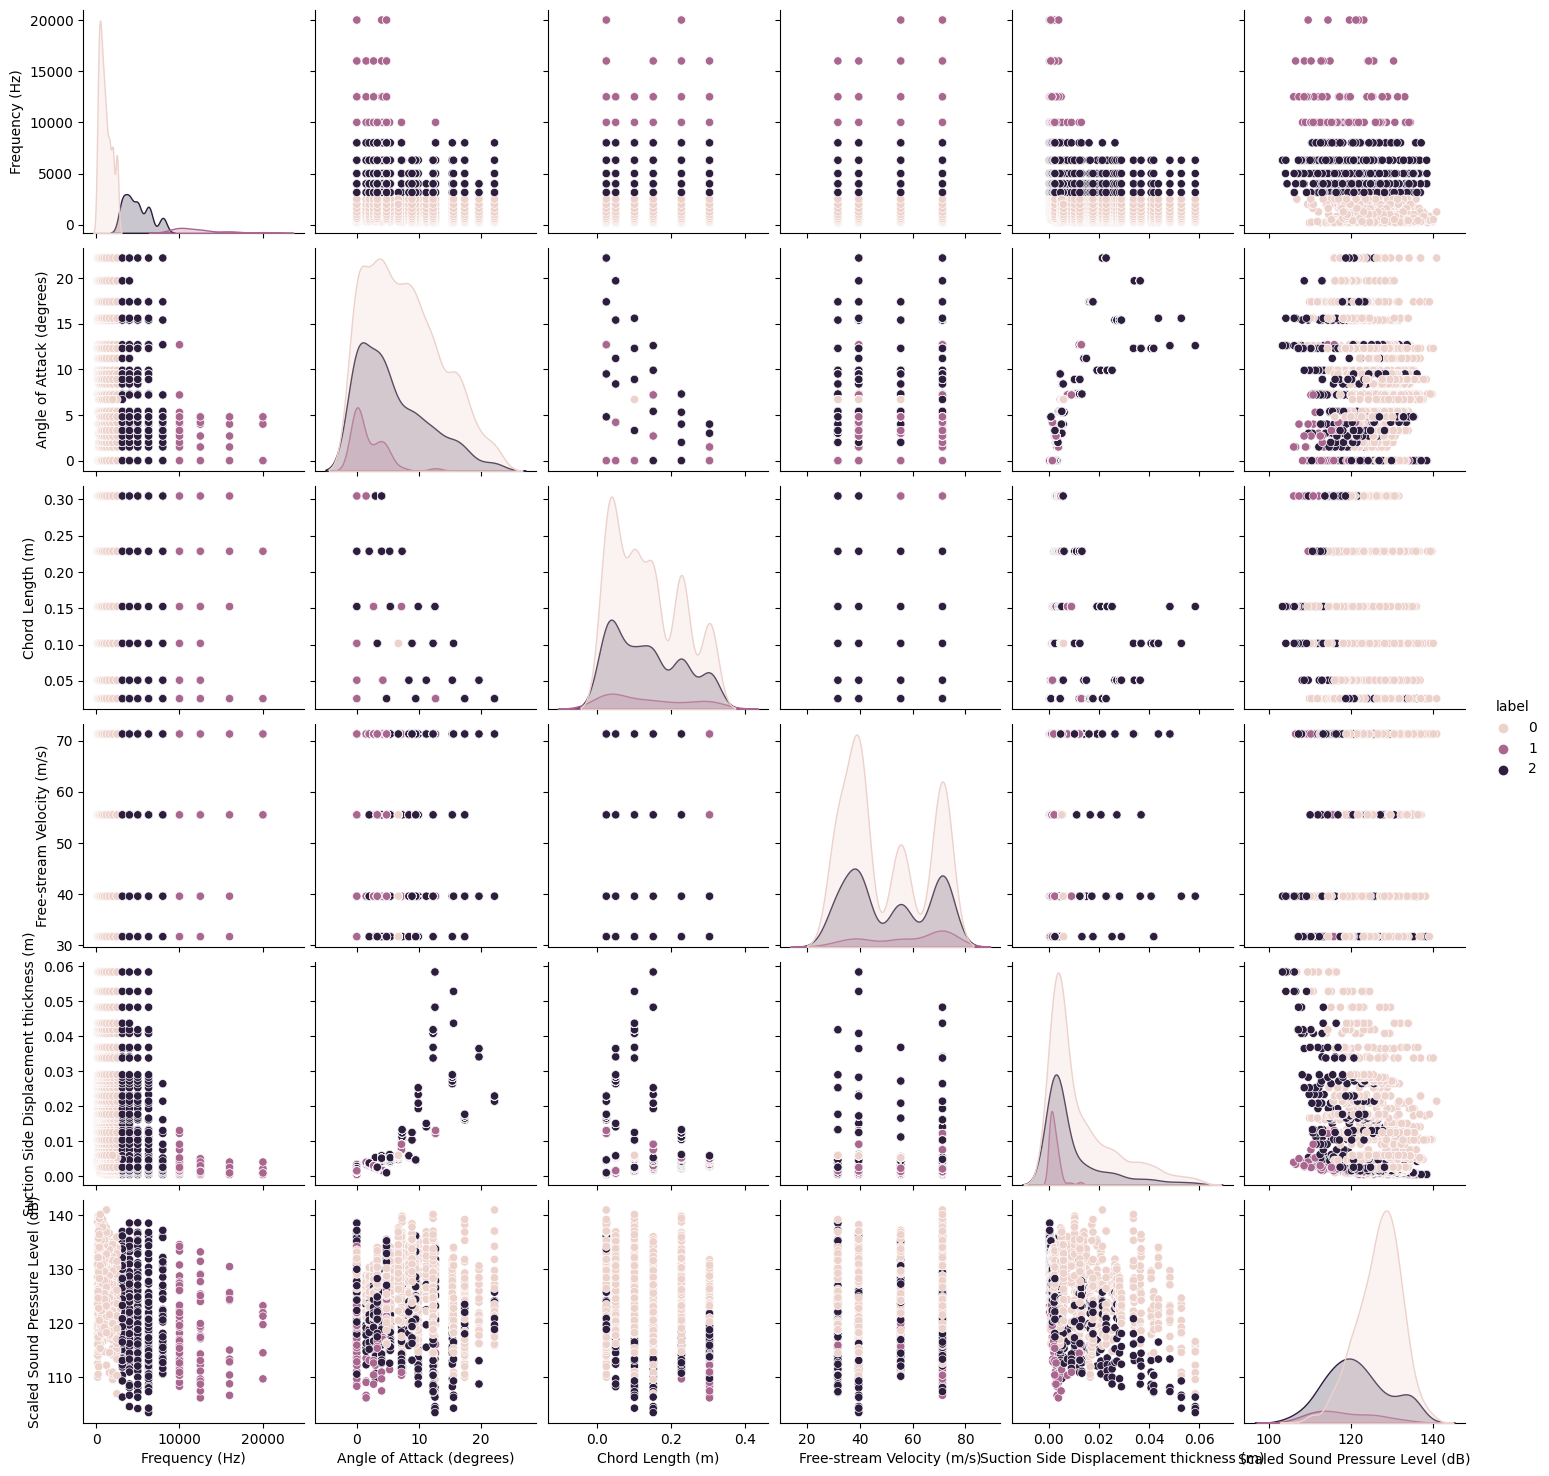

In [20]:
af_dataNumerical['label'] = label

sns.pairplot(af_dataNumerical, hue='label');

In [21]:
from sklearn.decomposition import PCA

pca = PCA(2)

af = af_dataNumerical.drop(columns=['label'])

af = pca.fit_transform(af)

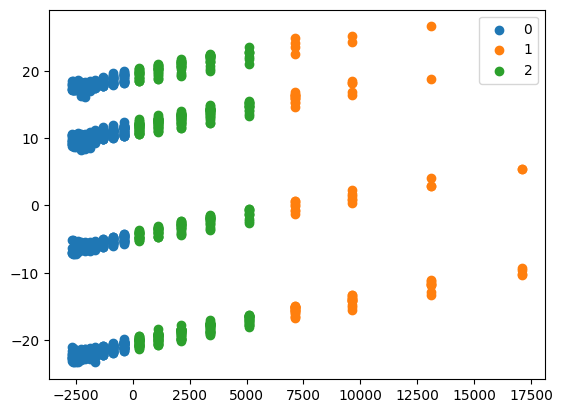

In [22]:
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(af[label == i, 0] , af[label == i, 1], label = i)
plt.legend()
plt.show()

## I normalized the data just to see what would happen

In [23]:
# Normalize the data set to do PCA again to make sure no single element 
# outweighs the others

af_data_norm = af_data

af_data_norm['Frequency_normalized'] = (af_data_norm['Frequency (Hz)'] - af_data_norm['Frequency (Hz)'].min()) / (af_data_norm['Frequency (Hz)'].max() - af_data_norm['Frequency (Hz)'].min())

af_data_norm['Angle of Attack_normalized'] = (af_data_norm['Angle of Attack (degrees)'] - af_data_norm['Angle of Attack (degrees)'].min()) / (af_data_norm['Angle of Attack (degrees)'].max() - af_data_norm['Angle of Attack (degrees)'].min())

af_data_norm['Chord Length_normalized'] = (af_data_norm['Chord Length (m)'] - af_data_norm['Chord Length (m)'].min()) / (af_data_norm['Chord Length (m)'].max() - af_data_norm['Chord Length (m)'].min())

af_data_norm['Free-stream Velocity_normalized'] = (af_data_norm['Free-stream Velocity (m/s)'] - af_data_norm['Free-stream Velocity (m/s)'].min()) / (af_data_norm['Free-stream Velocity (m/s)'].max() - af_data_norm['Free-stream Velocity (m/s)'].min())

af_data_norm['Suction Side Displacement thickness_normalized'] = (af_data_norm['Suction Side Displacement thickness (m)'] - af_data_norm['Suction Side Displacement thickness (m)'].min()) / (af_data_norm['Suction Side Displacement thickness (m)'].max() - af_data_norm['Suction Side Displacement thickness (m)'].min())

af_data_norm['Scaled Sound Pressure Level_normalized'] = (af_data_norm['Scaled Sound Pressure Level (dB)'] - af_data_norm['Scaled Sound Pressure Level (dB)'].min()) / (af_data_norm['Scaled Sound Pressure Level (dB)'].max() - af_data_norm['Scaled Sound Pressure Level (dB)'].min())

del af_data_norm['Scaled Sound Pressure Level (dB)']

del af_data_norm['Suction Side Displacement thickness (m)']

del af_data_norm['Free-stream Velocity (m/s)']

del af_data_norm['Chord Length (m)']

del af_data_norm['Angle of Attack (degrees)']

del af_data_norm['Frequency (Hz)']

af_data_norm.head()

,Categorized Sound Level,Frequency_normalized,Angle of Attack_normalized,Chord Length_normalized,Free-stream Velocity_normalized,Suction Side Displacement thickness_normalized,Scaled Sound Pressure Level_normalized
0,Not safe,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,Not safe,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,Not safe,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,Not safe,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,Not safe,0.090909,0.0,1.0,1.0,0.039005,0.640333


In [24]:
af_dataNumerical2 = af_data_norm.select_dtypes(include=np.number)

af2 = af_dataNumerical2

af2 = pca.fit_transform(af2)

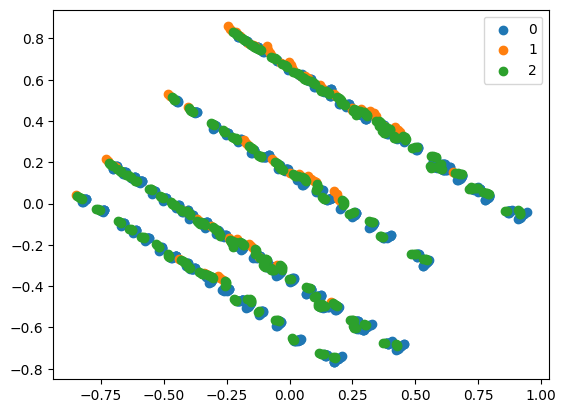

In [25]:
u_labels2 = np.unique(label)

for i in u_labels2:
    plt.scatter(af2[label == i, 0] , af2[label == i, 1], label = i)
plt.legend()
plt.show()

## This is done with the non-normalized data

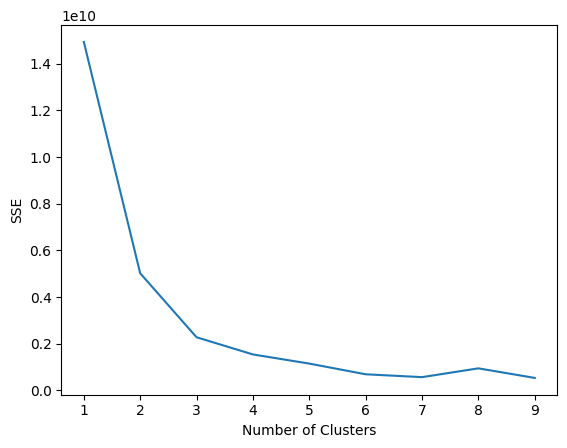

In [26]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init = 'random', n_init = 10).fit(af)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

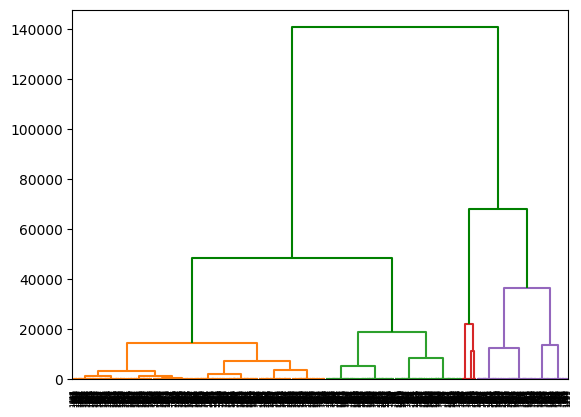

In [27]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
temp = hierarchy.linkage(af, 'ward')
plt.figure()
dn = hierarchy.dendrogram(temp, above_threshold_color="green", color_threshold = 40000)

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.3, min_samples = 10).fit(af)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of Clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of Clusters: 46
Estimated number of noise points: 663


In [29]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps = eps, min_samples = min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = 'Paired')
    plt.title("DBSCAN")

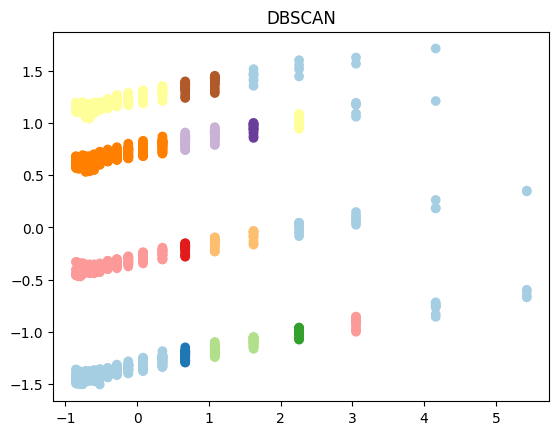

In [30]:
dbscan(af, 0.3, 10)

## I want to redo KMeans and PCA without the "output"

In [31]:
#same data set but with "variables" only
afv_data = af_data_pairplot.drop(columns=['Categorized Sound Level'])

In [32]:
KM = KMeans(3, init = 'random', n_init = 10)

KM.fit(afv_data)

centers = KM.cluster_centers_

label = KM.labels_

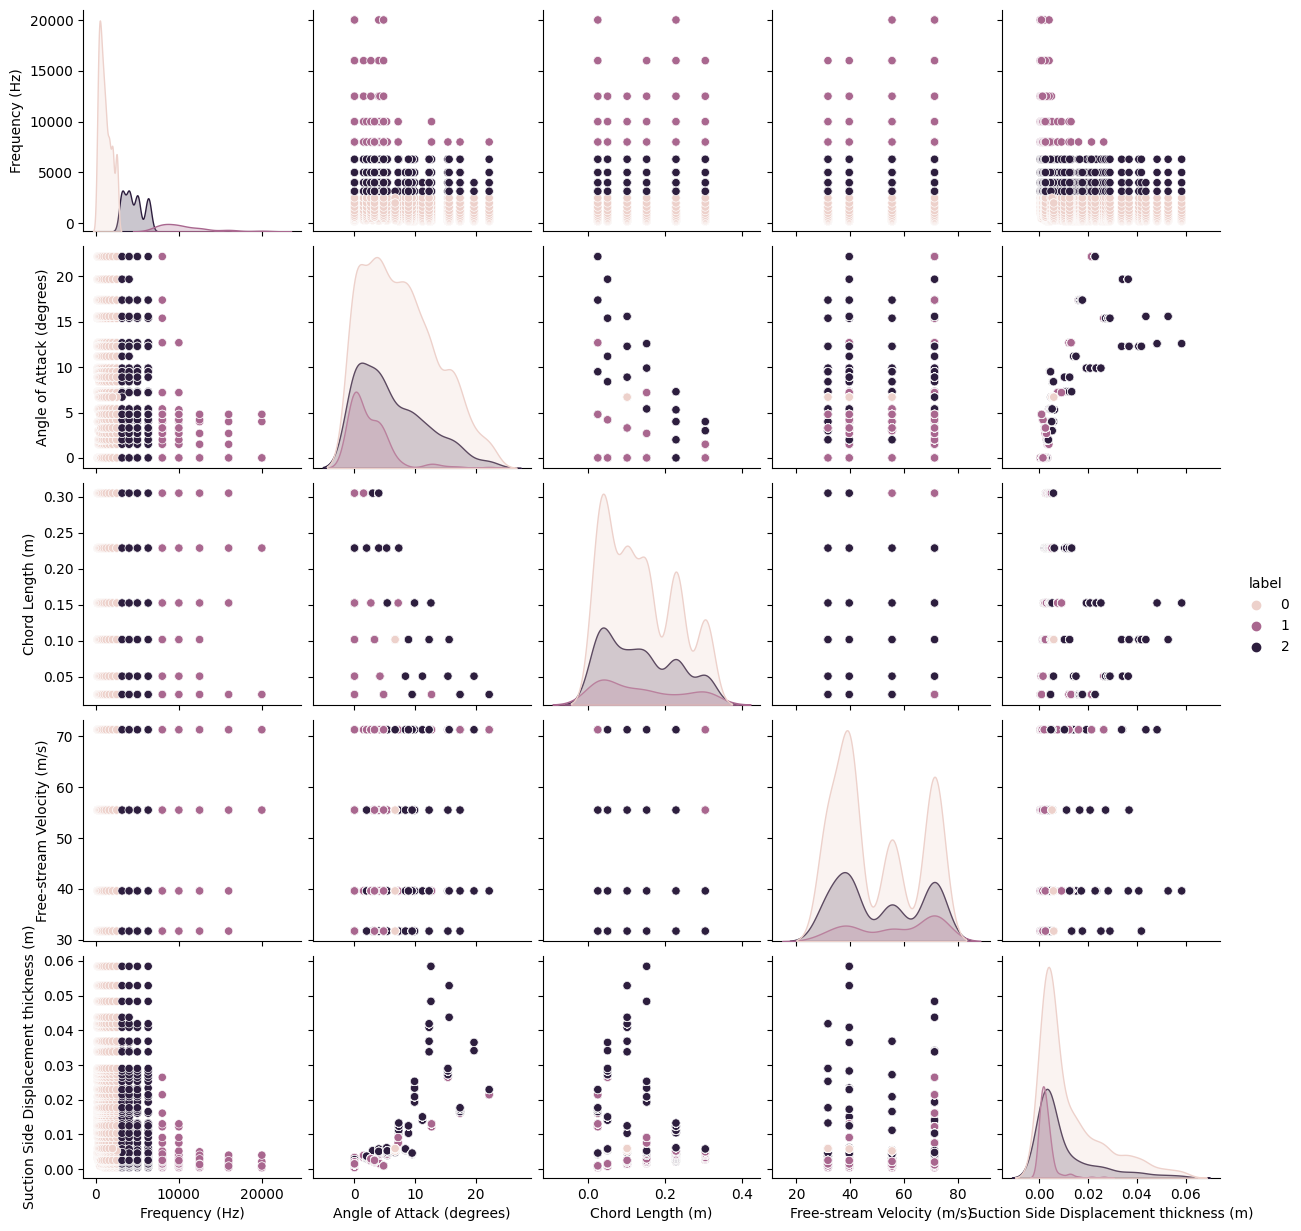

In [33]:
afv_data['label'] = label

sns.pairplot(afv_data, hue='label');

In [34]:
af3 = afv_data.drop(columns=['label'])

af3 = pca.fit_transform(af3)

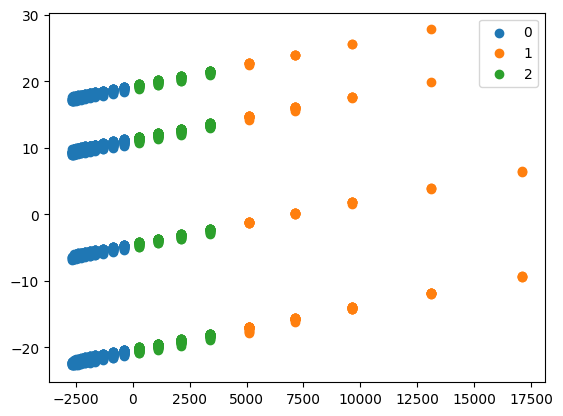

In [35]:
u_labels3 = np.unique(label)

for i in u_labels3:
    plt.scatter(af3[label == i, 0] , af3[label == i, 1], label = i)
plt.legend()
plt.show()

In [36]:
db2 = DBSCAN(eps=0.3, min_samples = 10).fit(af3)
labels = db2.labels_

n2_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n2_noise_ = list(labels).count(-1)

print("Estimated number of Clusters: %d" % n2_clusters_)
print("Estimated number of noise points: %d" % n2_noise_)

Estimated number of Clusters: 64
Estimated number of noise points: 126


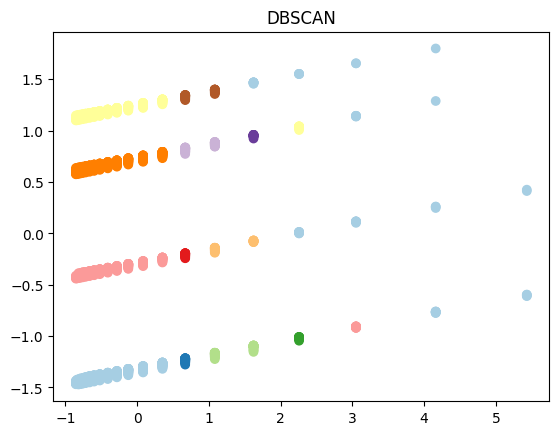

In [37]:
dbscan(af3, 0.3, 10)

## I now want to see what happens with normalized data without the "output"

In [38]:
afv_norm = af_data_norm.drop(columns=['Scaled Sound Pressure Level_normalized'])
afv_norm = afv_norm.drop(columns = ['Categorized Sound Level'])

In [39]:
Km = KMeans(3, init = 'random', n_init = 10)

Km.fit(afv_norm)

centers = Km.cluster_centers_

label = Km.labels_

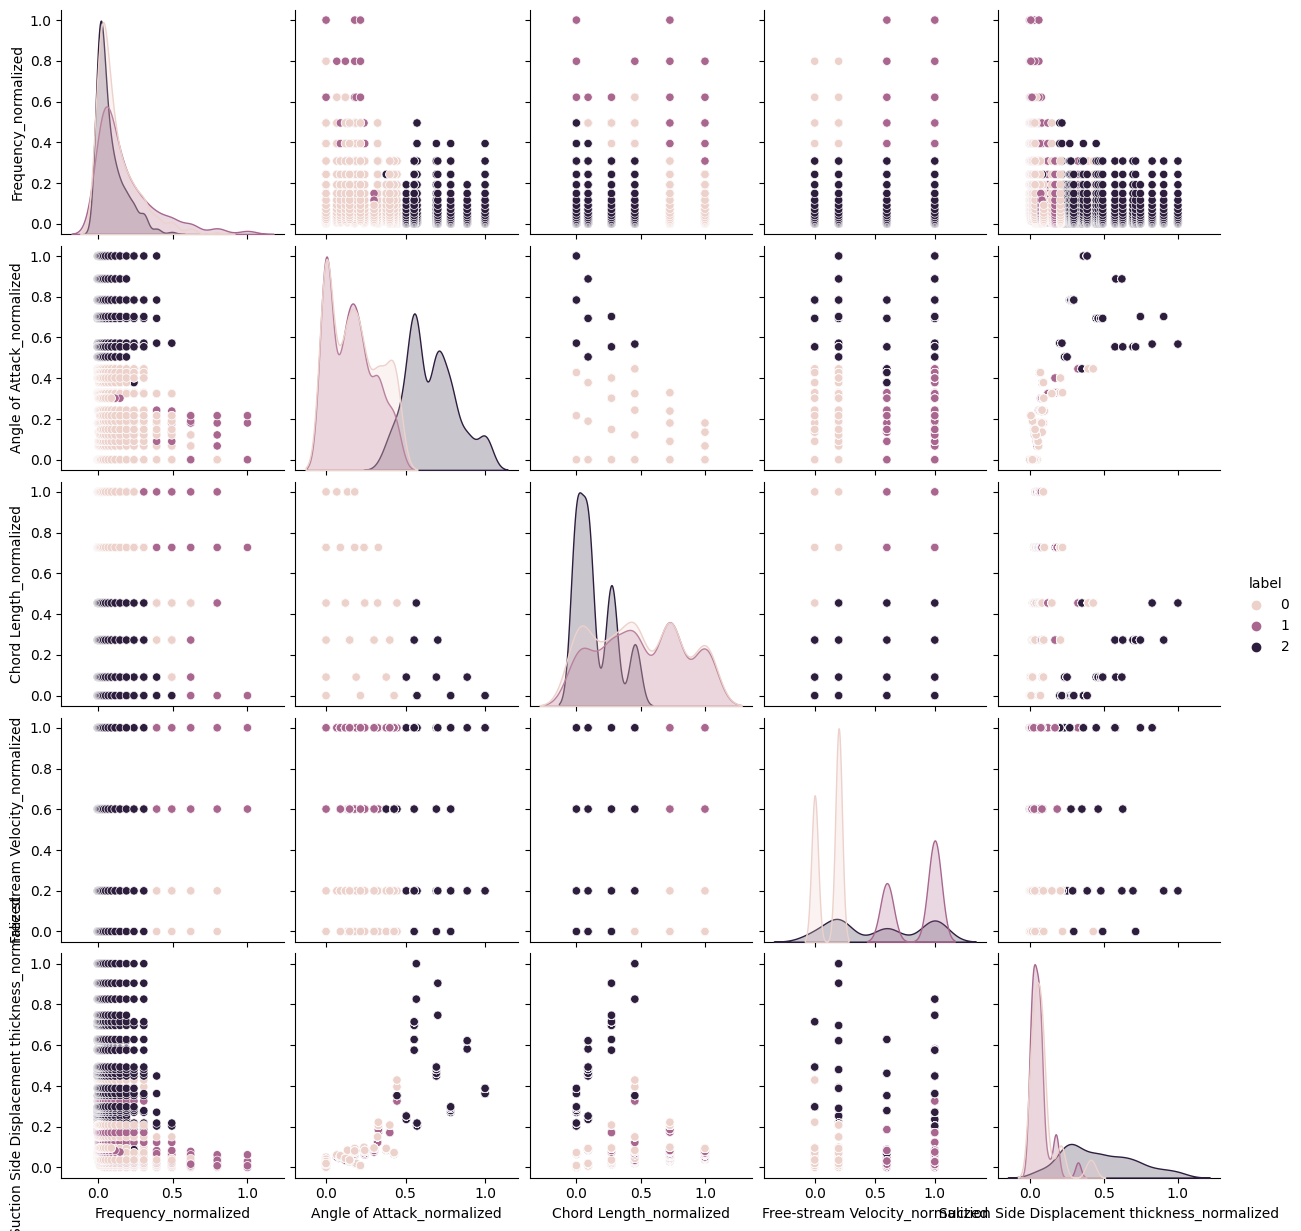

In [40]:
afv_norm['label'] = label

sns.pairplot(afv_norm, hue='label');

In [41]:
af4 = afv_norm.drop(columns=['label'])

af4 = pca.fit_transform(af4)

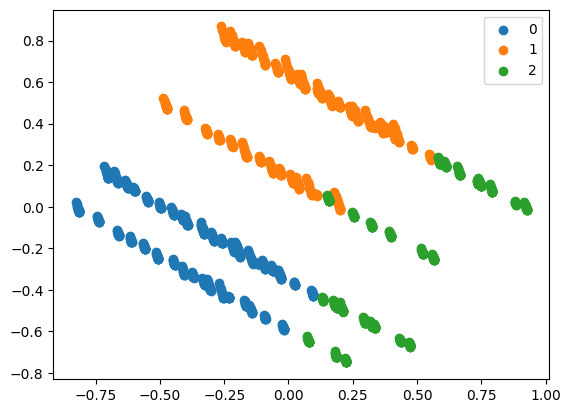

In [42]:
u_labels4 = np.unique(label)

for i in u_labels4:
    plt.scatter(af4[label == i, 0] , af4[label == i, 1], label = i)
plt.legend()
plt.show()

In [45]:
db3 = DBSCAN(eps=0.3, min_samples = 10).fit(af4)
labels = db3.labels_

n3_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n3_noise_ = list(labels).count(-1)

print("Estimated number of Clusters: %d" % n3_clusters_)
print("Estimated number of noise points: %d" % n3_noise_)

Estimated number of Clusters: 3
Estimated number of noise points: 0


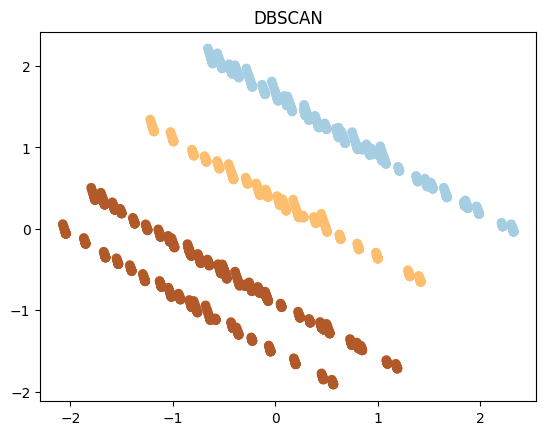

In [44]:
dbscan(af4, 0.4, 10)